In [1]:
!pip install dask pandas


In [2]:
import dask.dataframe as dd

# Load all NYC Taxi datasets into a single Dask DataFrame
df = dd.read_csv("yellow_tripdata_*.csv")

# Show first few rows
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [3]:
# Display column names and data types
print(df.dtypes)

# Count total rows (without triggering full computation)
print("Total Rows (Approximate):", len(df))


VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object
Total Rows (Approximate): 47248845


In [4]:
total_rides = df.shape[0].compute()
print(f"Total Rides: {total_rides}")


Total Rides: 47248845


In [5]:
print(df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [6]:
busiest_locations = df.groupby(['pickup_longitude', 'pickup_latitude']).size().compute()
busiest_locations = busiest_locations.sort_values(ascending=False)

print(busiest_locations.head(10))


pickup_longitude  pickup_latitude
 0.000000         0.000000           772525
-73.954666        40.821003            1523
-73.948639        40.744900            1043
-74.186302        40.693142             729
-73.863319        40.769485             520
-73.986717        40.722290             431
-73.915123        40.743576             307
-73.874458        40.774052             301
-73.870872        40.773739             299
-73.776703        40.645370             285
dtype: int64


In [7]:
import dask.dataframe as dd

# Convert pickup time to datetime format
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and count trips per hour
busiest_hours = df.groupby(df['tpep_pickup_datetime'].dt.hour).size().compute()
print(busiest_hours)


tpep_pickup_datetime
0     1691459
1     1246344
2      918449
3      689141
4      513887
5      477293
6     1034368
7     1756976
8     2154883
9     2173883
10    2107207
11    2191108
12    2327988
13    2325819
14    2428242
15    2390529
16    2156376
17    2524604
18    2986286
19    2976744
20    2748153
21    2683741
22    2565133
23    2180232
dtype: int64


In [8]:
avg_fare_per_passenger = df.groupby("passenger_count")["fare_amount"].mean().compute()
print(avg_fare_per_passenger)


passenger_count
0    13.840906
1    12.251608
2    12.960279
3    12.718561
4    12.811246
5    12.436996
6    12.241962
9    41.554559
7    38.433827
8    47.508718
Name: fare_amount, dtype: float64


In [9]:
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'])

# Compute trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Get average trip duration
avg_trip_duration = df['trip_duration'].mean().compute()
print(f"Average Trip Duration: {avg_trip_duration:.2f} minutes")


Average Trip Duration: 15.14 minutes


In [10]:
top_fares = df.nlargest(5, "fare_amount").compute()
print(top_fares[['fare_amount', 'passenger_count', 'trip_distance']])


        fare_amount  passenger_count  trip_distance
85486     429496.72                1            0.0
249991    154810.43                1       298914.2
415088    153231.93                1       151694.0
7071      133065.37                3       166331.6
208860    126348.88                2       131091.4


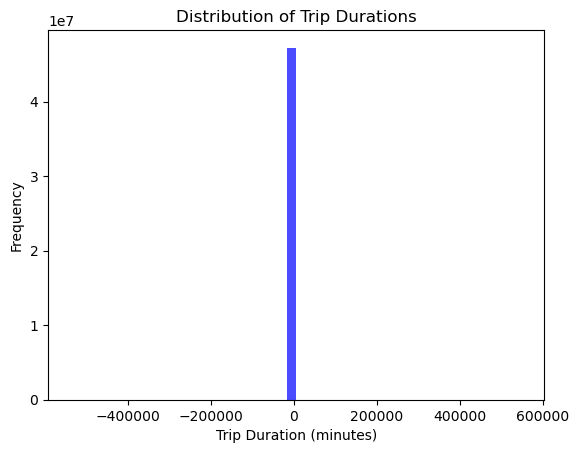

In [11]:
import matplotlib.pyplot as plt

# Compute trip durations and plot
trip_durations = df['trip_duration'].compute()
plt.hist(trip_durations, bins=50, color='blue', alpha=0.7)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()


In [12]:
df_sample = df.head(10000)  # Get 10,000 rows
df_sample.to_csv("sample_nyc_taxi_data.csv", index=False)


In [13]:
df.to_csv("processed_nyc_taxi_data", index=False)


['C:\\Users\\vyshn\\processed_nyc_taxi_data\\000.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\001.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\002.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\003.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\004.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\005.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\006.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\007.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\008.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\009.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\010.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\011.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\012.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\013.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\014.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\015.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\016.part',
 'C:\\Users\\vyshn\\processed_nyc_taxi_data\\017

In [14]:
df.to_parquet("processed_nyc_taxi_data.parquet")


In [15]:
import dask.dataframe as dd

# Reload the processed Parquet file
df_new = dd.read_parquet("processed_nyc_taxi_data.parquet")

# Show first few rows to confirm it's loaded
df_new.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,18.050000
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,19.833333
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,10.050000
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,1.866667
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,19.316667


In [16]:
df_new['tpep_pickup_datetime'] = dd.to_datetime(df_new['tpep_pickup_datetime'])

# Extract hour and count trips per hour
busiest_hours = df_new.groupby(df_new['tpep_pickup_datetime'].dt.hour).size().compute()

print(busiest_hours)


tpep_pickup_datetime
0     1691459
1     1246344
2      918449
3      689141
4      513887
5      477293
6     1034368
7     1756976
8     2154883
9     2173883
10    2107207
11    2191108
12    2327988
13    2325819
14    2428242
15    2390529
16    2156376
17    2524604
18    2986286
19    2976744
20    2748153
21    2683741
22    2565133
23    2180232
dtype: int64


In [17]:
df_new['tpep_dropoff_datetime'] = dd.to_datetime(df_new['tpep_dropoff_datetime'])
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60

# Compute average trip duration
avg_trip_duration = df_new['trip_duration'].mean().compute()
print(f"Average Trip Duration: {avg_trip_duration:.2f} minutes")


Average Trip Duration: 15.14 minutes
